
<center><h2>Отчет об изменениях направления миграции населения за последние 10 лет в России</h2>
    <center><h2>Сельское Население</h2>



***Примечание: данные начинаются с 1990 года и оканчиваются 2021. Отсчет последних 10 лет буду вести до 2021 года. То есть с 2012 по 2021 год включительно.***

**Короткие выводы по итогам анализа:**
 Миграционный рост от сильно отрицательного значения выбрался на положительное в течение 10 лет. Кажется, что сельское население получает прирост. Динамика роста положительная. Люди предпочитают перемещаться между разными регионами, а не внутри одного.
Миграционные движения имеют тенденцию увеличиваться с течением времени. Заметнее всего выглядит рост передвижений внутри страны.


Что сделано:
> Матрица корреляций. Признаки с наибольшей и наименьшей корреляцией. Гипотезы.
>
> **График 1.** Общее количество миграций в разные годы
>
> **График 2.** Количество миграций внутри страны и между регионами
>
> **График 3.** Количество миграций из/в другие регионы и страны
>
> **График 4.** Круговая диаграмма соотношения мигрантов по направлениям миграции
>
> **График 5.** График изменения миграционных потоков по годам
>
> **График 6.** График изменения миграционных перемещений по годам

### Импортирую библиотеки для анализа данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Прочту датасет и ознакомлюсь с содержимым

In [2]:
data = pd.read_csv("/Users/ivan/DS_educate/Tefal/RuralPopulation.csv", sep=';')

In [3]:
data.head()

,Years,Total Arrivals,Arrived within Country,Arrived within Region,Arrived from other Regions,Arrived from other Countries,Total Leaving,Leaving within Country,Leaving within Region,Leaving to other Regions,Leaving to other Countries,Total Migration Growth,Movements within Country,Movements within Regions,Movements between Regions,Migration Exchange with Foreign Countries
0,1990,1801941,1457542,891431,566111,344399,1707847,1498052,990158,507894,209795,94094,-40510,-98727,58217,134604
1,1991,1586562,1325169,810751,514418,261393,1421490,1239968,830489,409479,181522,165072,85201,-19738,104939,79871
2,1992,1571948,1199647,723857,475790,372301,1172489,998786,645275,353511,173703,399459,200861,78582,122279,198598
3,1993,1363223,1005535,585082,420453,357688,1117874,985545,611258,374287,132329,245349,19990,-26176,46166,225359
4,1994,1355335,937220,541481,395739,418115,1097016,1002876,643628,359248,94140,258319,-65656,-102147,36491,323975


#### Создам маску, которая оставляет только те строки, где значение Years больше 2011, и присвою эту маску переменной df.

In [4]:
df = data[data['Years'] > 2011]
df.head()

,Years,Total Arrivals,Arrived within Country,Arrived within Region,Arrived from other Regions,Arrived from other Countries,Total Leaving,Leaving within Country,Leaving within Region,Leaving to other Regions,Leaving to other Countries,Total Migration Growth,Movements within Country,Movements within Regions,Movements between Regions,Migration Exchange with Foreign Countries
22,2012,1226588,1133849,749444,384405,92739,1393219,1369091,908600,460491,24128,-166631,-235242,-159156,-76086,68611
23,2013,1282676,1181653,770958,410695,101023,1459827,1426685,944861,481824,33142,-177151,-245032,-173903,-71129,67881
24,2014,1314378,1190541,752909,437632,123837,1448072,1393261,912821,480440,54811,-133694,-202720,-159912,-42808,69026
25,2015,1369013,1235172,783657,451515,133841,1416548,1354837,872710,482127,61711,-47535,-119665,-89053,-30612,72130
26,2016,1354716,1233546,772293,461253,121170,1391178,1331466,853983,477483,59712,-36462,-97920,-81690,-16230,61458


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 22 to 31
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Years                                      10 non-null     int64
 1   Total Arrivals                             10 non-null     int64
 2   Arrived within Country                     10 non-null     int64
 3   Arrived within Region                      10 non-null     int64
 4   Arrived from other Regions                 10 non-null     int64
 5   Arrived from other Countries               10 non-null     int64
 6   Total Leaving                              10 non-null     int64
 7   Leaving within Country                     10 non-null     int64
 8   Leaving within Region                      10 non-null     int64
 9   Leaving to other Regions                   10 non-null     int64
 10  Leaving to other Countries                 10 non-n

In [6]:
df.describe()

,Years,Total Arrivals,Arrived within Country,Arrived within Region,Arrived from other Regions,Arrived from other Countries,Total Leaving,Leaving within Country,Leaving within Region,Leaving to other Regions,Leaving to other Countries,Total Migration Growth,Movements within Country,Movements within Regions,Movements between Regions,Migration Exchange with Foreign Countries
count,10.00000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,2016.50000,1.302229e+06,1.180686e+06,741237.300000,439448.200000,121543.800000,1.365869e+06,1.306350e+06,847777.200000,458572.800000,59519.000000,-63639.700000,-125664.500000,-106539.900000,-19124.60000,62024.800000
std,3.02765,7.199700e+04,6.999599e+04,43195.907412,38031.056338,16138.050094,1.024910e+05,1.099885e+05,74004.568558,40365.110658,20522.827199,73400.719788,75132.421728,41991.843595,35301.55103,17926.179966
min,2012.00000,1.171012e+06,1.046811e+06,646241.000000,384405.000000,92739.000000,1.173963e+06,1.085569e+06,700184.000000,385385.000000,24128.000000,-177151.000000,-245032.000000,-173903.000000,-76086.00000,31798.000000
25%,2014.25000,1.241386e+06,1.145800e+06,744444.000000,407757.250000,115338.750000,1.354581e+06,1.281429e+06,829361.250000,446638.500000,48899.500000,-117637.750000,-181956.250000,-144979.000000,-39759.00000,53307.000000
50%,2016.50000,1.328208e+06,1.198790e+06,751176.500000,444573.500000,122636.500000,1.392198e+06,1.343152e+06,860084.000000,478961.500000,60711.500000,-47415.500000,-99593.500000,-89582.000000,-12002.50000,68246.000000
75%,2018.75000,1.354308e+06,1.230310e+06,769152.750000,462690.750000,131431.000000,1.440191e+06,1.369077e+06,899627.500000,482051.250000,73151.500000,-11328.750000,-70999.250000,-82064.000000,11684.00000,71351.750000
max,2021.00000,1.381162e+06,1.267767e+06,783657.000000,504030.000000,146047.000000,1.459827e+06,1.426685e+06,944861.000000,502849.000000,88394.000000,34702.000000,-38758.000000,-53943.000000,21149.00000,90820.000000


#### Узнаю, сколько пропусков в данных

In [7]:
df.isna().sum()

Years                                        0
Total Arrivals                               0
Arrived within Country                       0
Arrived within Region                        0
Arrived from other Regions                   0
Arrived from other Countries                 0
Total Leaving                                0
Leaving within Country                       0
Leaving within Region                        0
Leaving to other Regions                     0
Leaving to other Countries                   0
Total Migration Growth                       0
Movements within Country                     0
Movements within Regions                     0
Movements between Regions                    0
Migration Exchange with Foreign Countries    0
dtype: int64

### Гляну на корреляцию признаков

In [8]:
corr_matrix = df.corr()
corr_matrix.head()

,Years,Total Arrivals,Arrived within Country,Arrived within Region,Arrived from other Regions,Arrived from other Countries,Total Leaving,Leaving within Country,Leaving within Region,Leaving to other Regions,Leaving to other Countries,Total Migration Growth,Movements within Country,Movements within Regions,Movements between Regions,Migration Exchange with Foreign Countries
Years,1.000000,-0.141455,-0.307327,-0.680196,0.206937,0.701903,-0.757082,-0.831984,-0.882802,-0.648514,0.678003,0.918381,0.931649,0.856111,0.964472,-0.144325
Total Arrivals,-0.141455,1.000000,0.974558,0.797143,0.888270,0.234345,0.697943,0.603104,0.469315,0.782929,0.253303,0.006322,0.025032,-0.007100,0.061720,-0.079026
Arrived within Country,-0.307327,0.974558,1.000000,0.879592,0.841450,0.010487,0.818258,0.737264,0.608030,0.894177,0.135145,-0.186631,-0.147667,-0.166752,-0.115925,-0.145280
Arrived within Region,-0.680196,0.797143,0.879592,1.000000,0.483079,-0.258770,0.932635,0.926379,0.872659,0.924320,-0.307183,-0.520361,-0.536694,-0.509262,-0.536472,0.118722
Arrived from other Regions,0.206937,0.888270,0.841450,0.483079,1.000000,0.313214,0.446707,0.304744,0.127905,0.595880,0.597635,0.247536,0.337801,0.271517,0.395968,-0.402233


Меня будут интересовать признаки, имеющий коэффициент корреляции больше `0.5`
Вынесу в отдельную переменную, чтобы иметь возможность менять его.

In [9]:
top_corr_coef = 0.5

использую метод `where()` для создания новой матрицы, где значения меньше или равные `acc_corr_coef` заменяются на `NaN`, а затем метод `stack()` для преобразования матрицы в объект Series, содержащий все пары признаков с ненулевыми значениями.

In [10]:
def show_corr(acc_corr_coef, asc):
    # np.triu() создает матрицу с единицами на верхней половине (включая главную диагональ)
    # astype(bool) приводит ее к типу bool и where() заменяет нулевые значения на NaN.
    corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    #stack() создает Series, содержащий все пары признаков с ненулевыми значениями, а reset_index() преобразует индекс в столбцы. 
    corr_pairs = corr_pairs.stack().reset_index()

    # затем фильтрую только пары признаков, где корреляция больше 0.5
    corr_pairs = corr_pairs[corr_pairs[0] > acc_corr_coef]
    
    # сортирую набор данных по убыванию коэффициента корреляции
    sorted_corr_pairs = corr_pairs.sort_values(0, ascending=asc)
    return sorted_corr_pairs

In [11]:
ascF = False # список по убыванию

show_corr(top_corr_coef, ascF).head(25)

,level_0,level_1,0
75,Total Leaving,Leaving within Country,0.983812
84,Leaving within Country,Leaving within Region,0.979452
114,Movements within Country,Movements within Regions,0.976560
15,Total Arrivals,Arrived within Country,0.974558
110,Total Migration Growth,Movements within Country,0.971137
77,Total Leaving,Leaving to other Regions,0.970693
115,Movements within Country,Movements between Regions,0.966667
13,Years,Movements between Regions,0.964472
111,Total Migration Growth,Movements within Regions,0.948699
112,Total Migration Growth,Movements between Regions,0.938379


Теперь хочу посмотреть наименьшую корреляцию, передав функции новые параметры

In [12]:
ascT = True # список по возрастанию
min_corr_coef = -0.001 # больше такого числа, чтобы поближе к нулю

show_corr(min_corr_coef, ascT).head(10)

,level_0,level_1,0
24,Total Arrivals,Total Migration Growth,0.006322
31,Arrived within Country,Arrived from other Countries,0.010487
113,Total Migration Growth,Migration Exchange with Foreign Countries,0.024370
25,Total Arrivals,Movements within Country,0.025032
91,Leaving within Country,Migration Exchange with Foreign Countries,0.054263
27,Total Arrivals,Movements between Regions,0.061720
53,Arrived within Region,Migration Exchange with Foreign Countries,0.118722
57,Arrived from other Regions,Leaving within Region,0.127905
36,Arrived within Country,Leaving to other Countries,0.135145
98,Leaving within Region,Migration Exchange with Foreign Countries,0.187559


#### Визуализирую матрицу корреляций

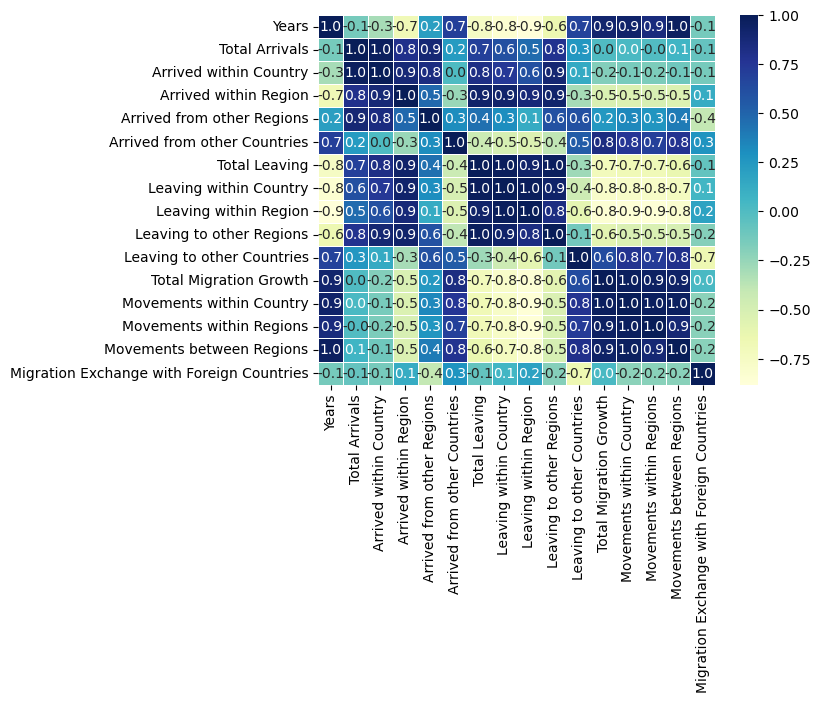

In [13]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, linewidth=.5, fmt=".1f")
  
plt.show()

***Корреляция признаков не является фактом их причинно-следственных связей. Но мы можем заметить определенные закономерности и высказать гипотезы.***

### Наблюдения по итогам анализа:

1. Корреляции между годом и количеством уехавших и приехавших нет, этот факт может указывать на то, что год не является определяющим фактором для количества людей, уезжающих и приезжающих в страну. 

2. Также отмечу высокую корреляцию признаков общего числа приехавших и уехавших людей (0.955). Это может говорить о том, что в масштабе общей миграции существует численный баланс. 

3. Интересная корреляция между годом и прибылью населения, видимо, с годами миграционный рост имеет положительную динамику. 

### Для визуализации направлений миграции, буду использовать графики.

#### График №1: общее количество миграций в разные годы. По оси x будут располагаться годы, а по оси y - количество миграций.

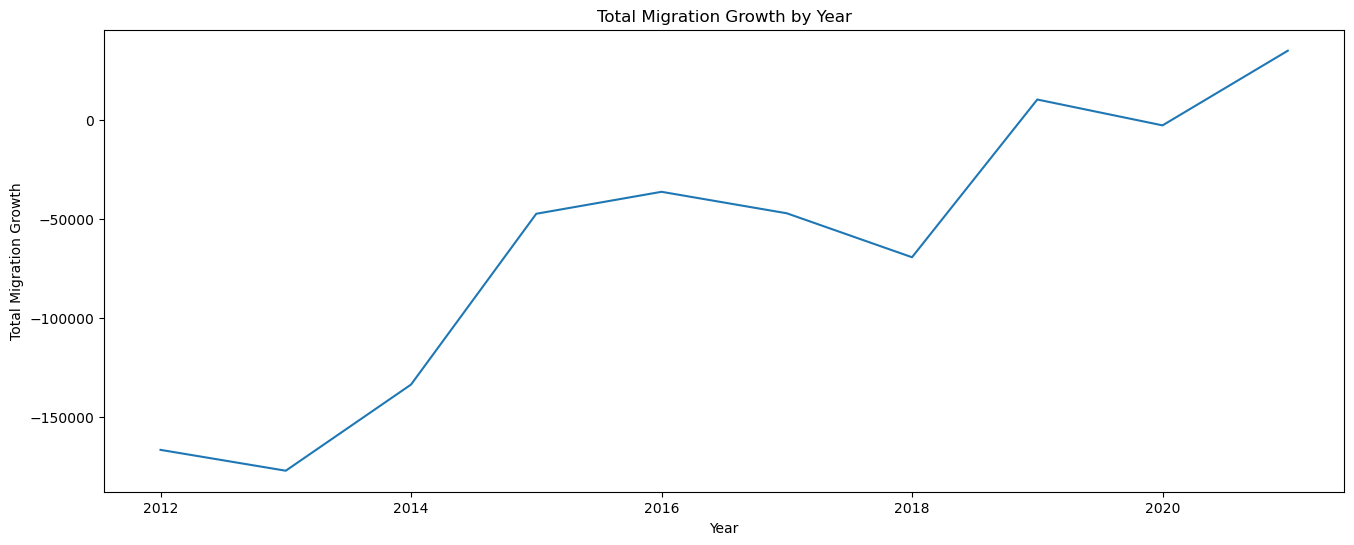

In [14]:
# создаем график миграции по годам
plt.figure(figsize=(16, 6)) # устанавливаем ширину в 16 дюймов, а высоту в 6 дюймов
ax = sns.lineplot(x='Years', y='Total Migration Growth', data=df)
ax.set(title='Total Migration Growth by Year', xlabel='Year', ylabel='Total Migration Growth')
plt.show()

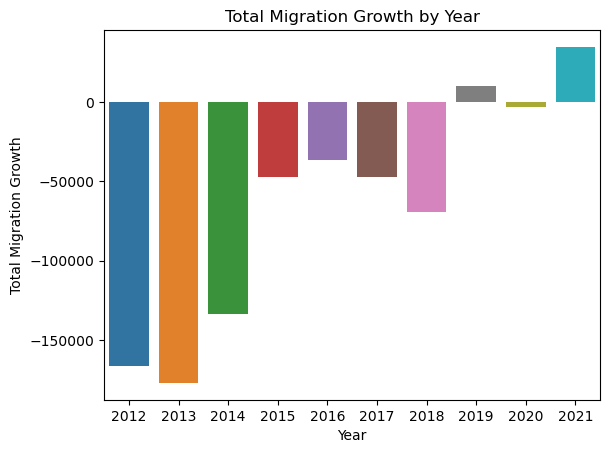

In [15]:
sns.barplot(x='Years', y='Total Migration Growth', data=df)
plt.title('Total Migration Growth by Year')
plt.xlabel('Year')
plt.ylabel('Total Migration Growth')
plt.show()

##### Выводы:
Миграционный рост от сильно отрицательного значения выбрался на положительное в течение 10 лет. Кажется, что сельское население получает прирост. Динамика роста положительная.

#### График №2:  количество миграций внутри страны и между регионами. 

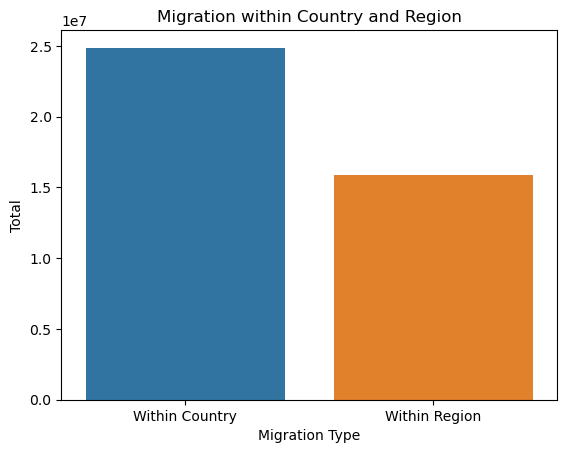

In [16]:
ax = sns.barplot(x=['Within Country', 'Within Region'],
                 y=[df['Arrived within Country'].sum() + df['Leaving within Country'].sum(), 
                    df['Arrived within Region'].sum() + df['Leaving within Region'].sum()])

ax.set(title='Migration within Country and Region', xlabel='Migration Type', ylabel='Total')

plt.show()

##### Выводы:
Судя по графику, люди предпочитают перемещаться между разными регионами, а не внутри одного. 

#### График №3: количество миграций из/в другие регионы и страны. Здесь мы выводим на оси x все категории миграций с зарубежа и выводим на ней соответствующие суммы на оси y.

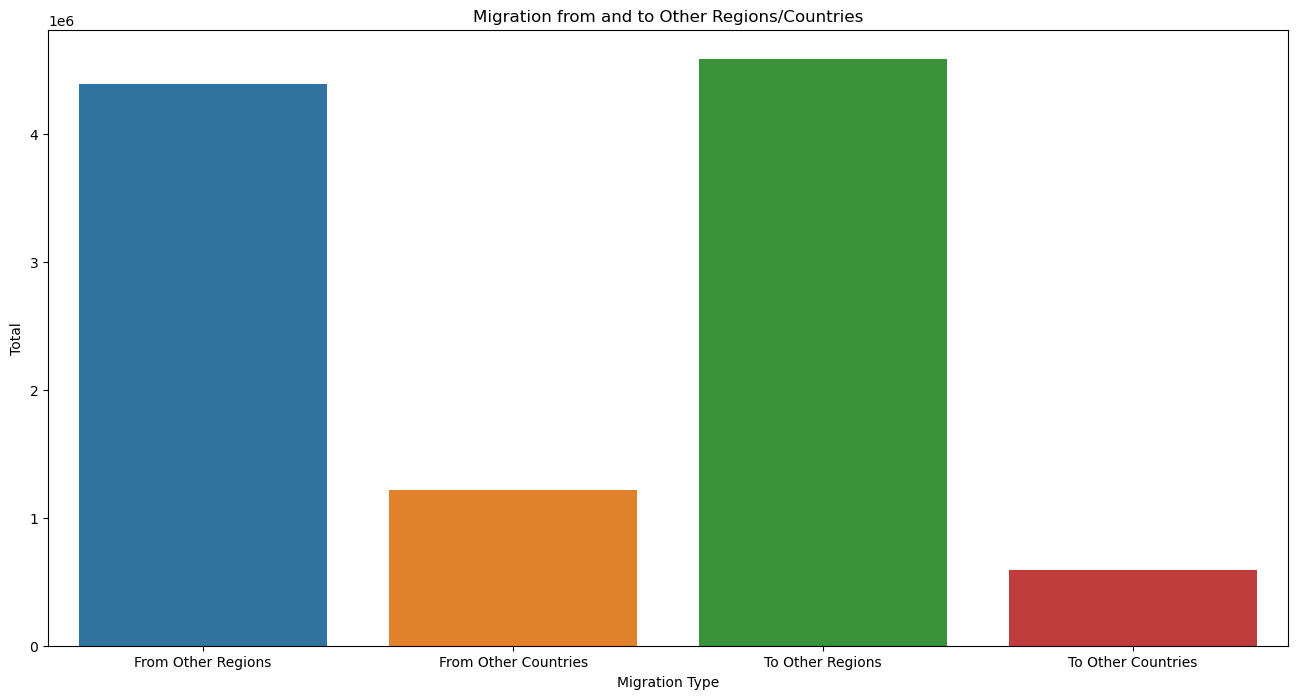

In [17]:
# создаем график миграции с зарубежа
plt.figure(figsize=(16, 8)) 
ax = sns.barplot(x=['From Other Regions', 'From Other Countries', 'To Other Regions', 'To Other Countries'],
                 y=[df['Arrived from other Regions'].sum(), df['Arrived from other Countries'].sum(), 
                    df['Leaving to other Regions'].sum(), df['Leaving to other Countries'].sum()])

ax.set(title='Migration from and to Other Regions/Countries', xlabel='Migration Type', ylabel='Total')

plt.show()

##### Выводы:
Здесь интересно то, что за последние 10 лет иммиграция в сельскую местность из других стран превышает эмиграцию из России.

#### График №4: Круговая диаграмма соотношения мигрантов по направлениям миграции

Здесь мы используем круговую диаграмму, чтобы отобразить соотношение мигрантов по направлениям миграции. 
**Каждый сектор круга соответствует одному из направлений миграции, а его размер определяется долей мигрантов, прибывших из этого направления.**

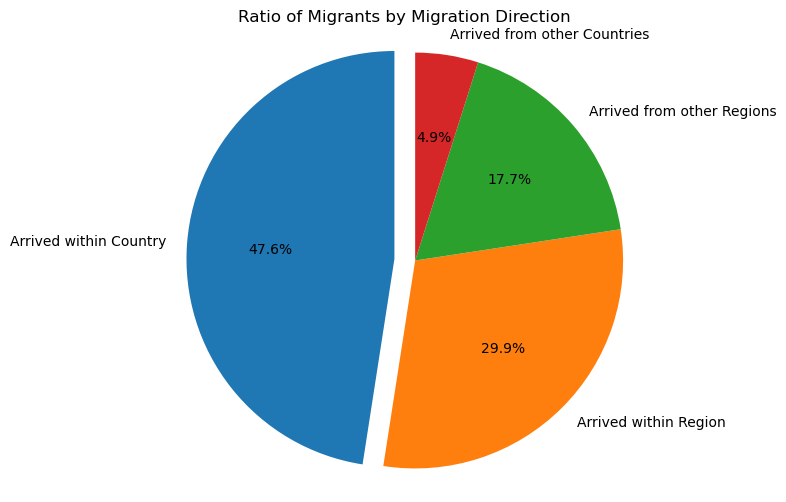

In [18]:
labels = ['Arrived within Country', 'Arrived within Region', 'Arrived from other Regions', 'Arrived from other Countries']
sizes = [df['Arrived within Country'].sum(), 
         df['Arrived within Region'].sum(),
         df['Arrived from other Regions'].sum(), 
         df['Arrived from other Countries'].sum()]

explode = (0.1, 0, 0, 0)  

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Ratio of Migrants by Migration Direction')

plt.show()


##### Выводы
Здесь заметен тот факт, что основную долю миграции составляет внутренняя миграция.

#### График №5: График изменения миграционных потоков по годам

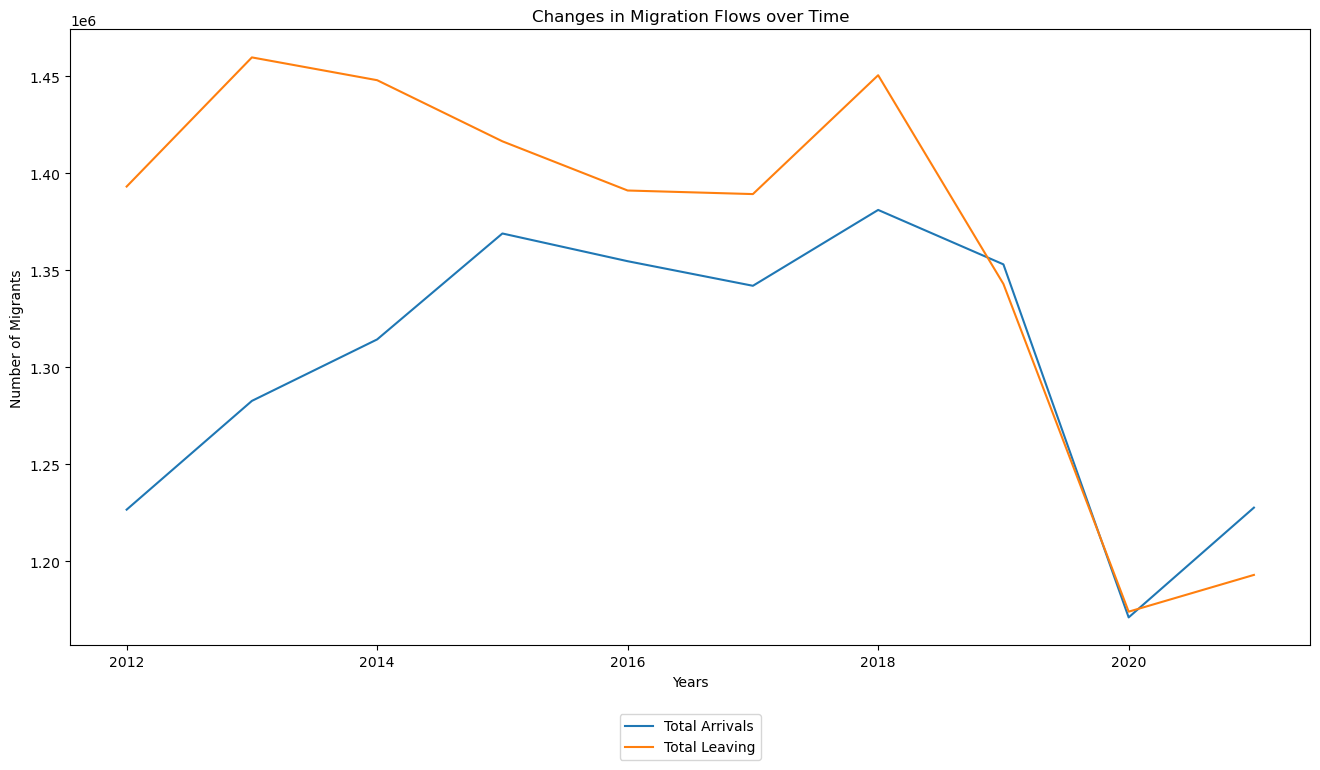

In [19]:
plt.figure(figsize=(16,8))
plt.plot(df['Years'], df['Total Arrivals'], label='Total Arrivals')
plt.plot(df['Years'], df['Total Leaving'], label='Total Leaving')
# размещу легенду не на графике, а под ним
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.title('Changes in Migration Flows over Time')
plt.xlabel('Years')
plt.ylabel('Number of Migrants')
plt.show()

#### Выводы:
После продолжительного роста на протяжении 8 лет число миграционных потоков резко пошло вниз после 2018 года, нащупало дно в 2020 году и пошло вновь наверх.

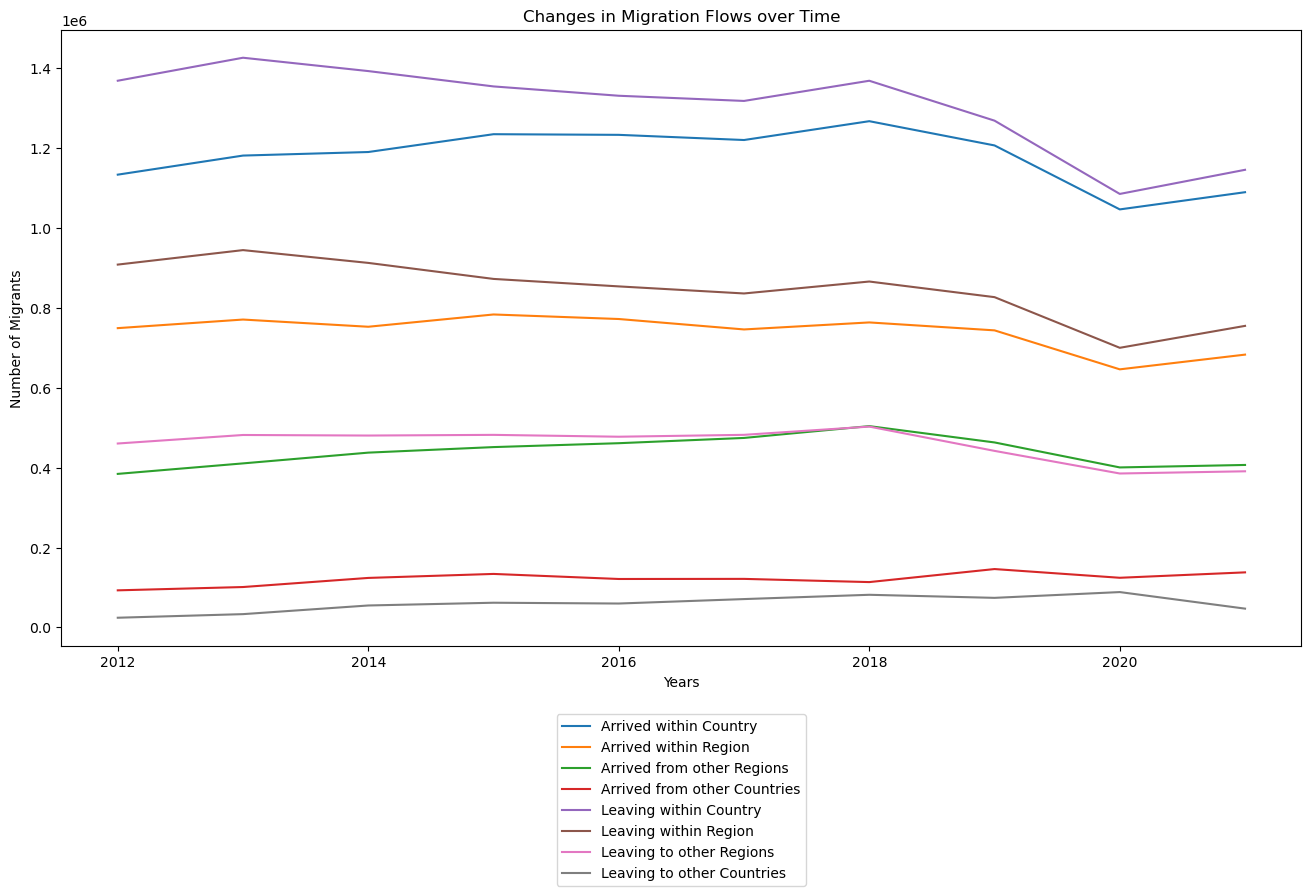

In [20]:
# создаем график изменения миграционных потоков по годам
plt.figure(figsize=(16,8))
plt.plot(df['Years'], df['Arrived within Country'], label='Arrived within Country')
plt.plot(df['Years'], df['Arrived within Region'], label='Arrived within Region')
plt.plot(df['Years'], df['Arrived from other Regions'], label='Arrived from other Regions')
plt.plot(df['Years'], df['Arrived from other Countries'], label='Arrived from other Countries')
plt.plot(df['Years'], df['Leaving within Country'], label='Leaving within Country')
plt.plot(df['Years'], df['Leaving within Region'], label='Leaving within Region')
plt.plot(df['Years'], df['Leaving to other Regions'], label='Leaving to other Regions')
plt.plot(df['Years'], df['Leaving to other Countries'], label='Leaving to other Countries')

# размещу легенду не на графике, а под ним
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.title('Changes in Migration Flows over Time')
plt.xlabel('Years')
plt.ylabel('Number of Migrants')
plt.show()

##### Выводы
Миграционные потоки имеют тенденцию убывать с течением времени.

#### График №6: График изменения миграционных перемещений по годам

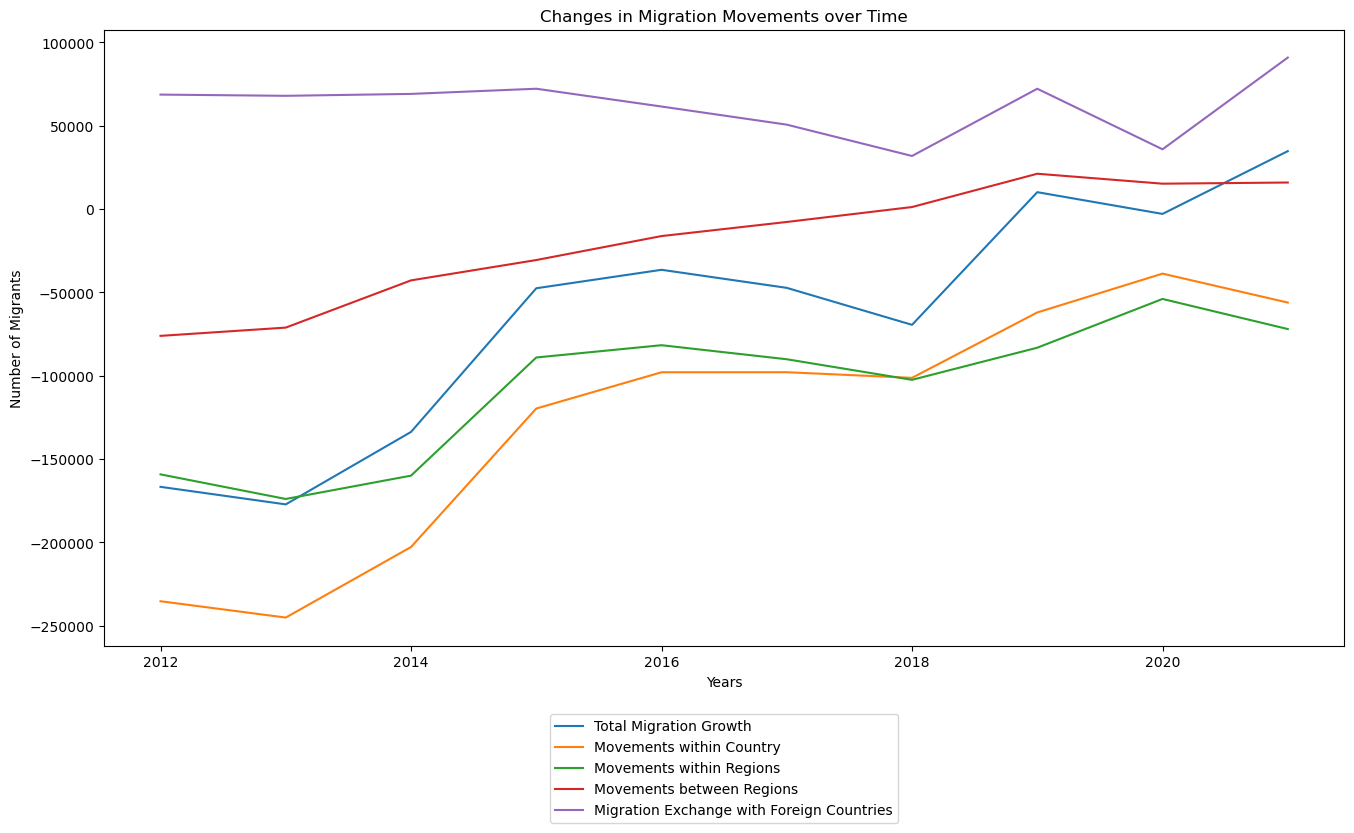

In [21]:
# создаем график изменения миграционных потоков по годам
plt.figure(figsize=(16,8))
plt.plot(df['Years'], df['Total Migration Growth'], label='Total Migration Growth')
plt.plot(df['Years'], df['Movements within Country'], label='Movements within Country')
plt.plot(df['Years'], df['Movements within Regions'], label='Movements within Regions')
plt.plot(df['Years'], df['Movements between Regions'], label='Movements between Regions')
plt.plot(df['Years'], df['Migration Exchange with Foreign Countries'], label='Migration Exchange with Foreign Countries')

# размещу легенду не на графике, а под ним
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.title('Changes in Migration Movements over Time')
plt.xlabel('Years')
plt.ylabel('Number of Migrants')
plt.show()

##### Выводы
Миграционные движения имеют тенденцию увеличиваться с течением времени. Заметнее всего выглядит рост передвижений внутри страны.